<a href="https://colab.research.google.com/github/Dapesy/insurance-charges-prediction/blob/main/insurance_charges_prediction(hamoye_lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score


Data Loading and Inspection

In [41]:
# Load the dataset into a pandas DataFrame.
df = pd.read_csv('insurance.csv')

# Display the first 5 rows of the dataset.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
# Display the summary statistics of the dataset (mean, standard deviation, minimum, maximum, etc.).
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
#Check for missing values in the dataset and handle them (if any) appropriately.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Visualization

<Axes: xlabel='smoker', ylabel='Count'>

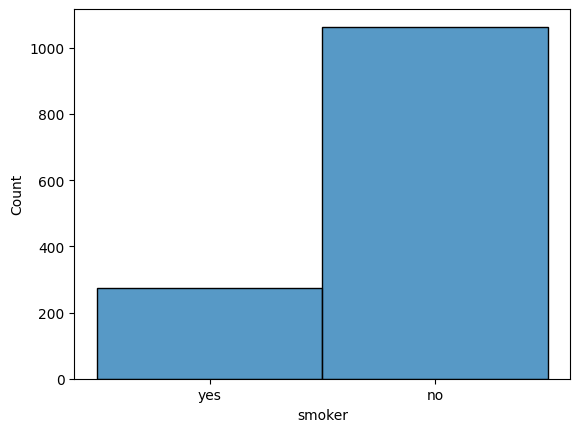

In [45]:
# Create a bar chart to visualize the distribution of individuals based on their smoker status.
sns.histplot(data='df', x=df['smoker'])

<Axes: xlabel='age', ylabel='charges'>

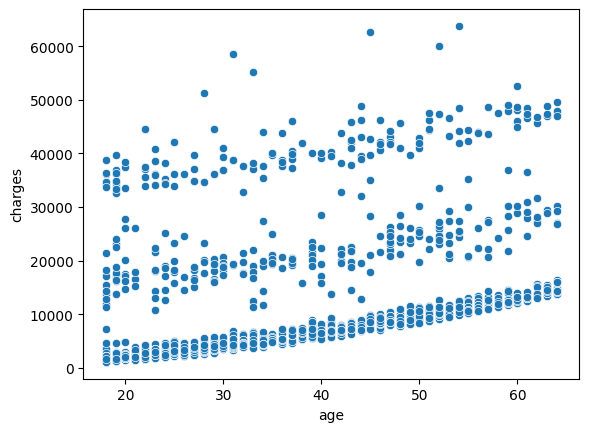

In [46]:
# Create a scatter plot to visualize the relationship between age and charges.
sns.scatterplot(data=df, x=df['age'], y=df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

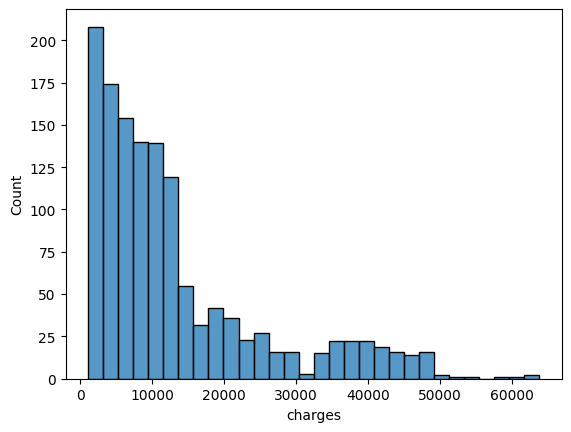

In [47]:
# Create a histogram to visualize the distribution of charges.
sns.histplot(data='df', x=df['charges'])

Data Analysis

In [48]:
# Calculate and print the average BMI (Body Mass Index) of the individuals in the dataset.
avg_bmi = np.mean(df['bmi'])
print(avg_bmi)

30.66339686098655


In [49]:
# Calculate and print the percentage of individuals who have children.
total = len(df['children'])
no_child = len(df[df['children']==0])

percent_children = ((total - no_child) / total)*100

print(percent_children)

57.100149476831085


In [50]:
len(df['smoker'].unique())

2

In [51]:
# Calculate and print the average insurance charges for individuals who smoke
avg_charge_smoker = len(df[df['smoker']=='yes']['charges']) / len(df['charges'].unique())
print(avg_charge_smoker)

# Calculate and print the average insurance charges for those who do not smoke.
avg_charge_not_smoker = len(df[df['smoker']=='no']['charges']) / len(df['charges'].unique())
print(avg_charge_not_smoker)


0.2049364248317128
0.7958115183246073


Predictive Analysis

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
# Prepare the data by encoding categorical variables and splitting it into training and testing sets.

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [54]:
x = df.drop('charges', axis=1)
y = df['charges']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [56]:
!pip install catboost
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
lasso, linear, ridge, dtr , rfr, svr, gbr , gnb, cat, xgb= Lasso(),LinearRegression(),  Ridge(), DecisionTreeRegressor(),RandomForestRegressor(), SVR(), GradientBoostingRegressor(),GaussianNB(),CatBoostRegressor(),XGBRegressor()
model = [lasso, linear,  ridge, dtr,rfr , svr, gbr, cat, xgb]
score = []
for model in model:
    model.fit(X_train, y_train)
    scores = model.score(X_test, y_test)
    score.append({
        'model' : model,
        'score' : scores
    })
score

Learning rate set to 0.040517
0:	learn: 11635.1505800	total: 937us	remaining: 936ms
1:	learn: 11294.4034655	total: 2.22ms	remaining: 1.11s
2:	learn: 10966.7856266	total: 3.09ms	remaining: 1.03s
3:	learn: 10653.7420676	total: 4.21ms	remaining: 1.05s
4:	learn: 10334.9390736	total: 5.2ms	remaining: 1.03s
5:	learn: 10036.3202731	total: 6.36ms	remaining: 1.05s
6:	learn: 9761.5734680	total: 7.35ms	remaining: 1.04s
7:	learn: 9494.3153887	total: 8.33ms	remaining: 1.03s
8:	learn: 9232.5279318	total: 9.13ms	remaining: 1s
9:	learn: 9009.3854454	total: 9.91ms	remaining: 982ms
10:	learn: 8782.8527358	total: 10.3ms	remaining: 928ms
11:	learn: 8569.2866075	total: 11.3ms	remaining: 931ms
12:	learn: 8375.3656934	total: 12.3ms	remaining: 931ms
13:	learn: 8166.6471778	total: 12.8ms	remaining: 902ms
14:	learn: 7975.9717134	total: 13.8ms	remaining: 903ms
15:	learn: 7791.9480394	total: 14.6ms	remaining: 898ms
16:	learn: 7598.1799829	total: 15.4ms	remaining: 889ms
17:	learn: 7430.2159368	total: 16.2ms	remain

[{'model': Lasso(), 'score': 0.724557769858228},
 {'model': LinearRegression(), 'score': 0.7245479824622909},
 {'model': Ridge(), 'score': 0.7249595509140164},
 {'model': DecisionTreeRegressor(), 'score': 0.683391162695892},
 {'model': RandomForestRegressor(), 'score': 0.8194572482360021},
 {'model': SVR(), 'score': -0.15408504971593806},
 {'model': GradientBoostingRegressor(), 'score': 0.8428588539583302},
 {'model': <catboost.core.CatBoostRegressor at 0x7fb037e5d4e0>,
  'score': 0.8248886507048363},
 {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot

In [57]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [58]:
y_pred = model.predict(X_test)


In [59]:
 mae = mean_absolute_error(y_test, y_pred)
 r2 = r2_score(y_test, y_pred)

 print('r2 score for the model is', r2)
 print('mean absolute error for the model is', mae)

r2 score for the model is 0.8428702672585765
mean absolute error for the model is 2561.9782595380566


# **DATA INTERPRETATION**



from the data analysis i performed , i discover that the average Body Mass Index in the dataset is 30.6634

i also discovered that 57% of the peoplein the dataset haschildren

the average charges for individuals that smoke id 0.2, while the average charges for individuals that dont smoke is 0.8

from the data visualization, the number of peoplr that don't smoke is more that the people that smoke , also as the age of the individual increase the charges also increase, and also lower charges has thehighest number of frequencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

With R2 score of 0.8429 suggests that my model explains a substantial portion of the variance in the data, indicating good predictive performance.

 on average, my model's predictions are off by about 2561.98 units when compared to the actual values.